Q1: What is Estimation Statistics? Explain point estimate and interval estimate.
    
    Estimation statistics involves using sample data to make inferences about population parameters. There are two main types of estimates in estimation statistics: point estimates and interval estimates.

- <b/> Point Estimate: </b> A point estimate is a single value that is used to estimate the population parameter of interest. It's essentially the best guess based on the available data. For example, if you want to estimate the mean height of students in a school, you might calculate the mean height of a sample of students and use that value as the point estimate for the population mean height.

- <b/> Interval Estimate: </b> An interval estimate, also known as a confidence interval, provides a range of values within which the population parameter is likely to lie, along with a level of confidence associated with that range. For instance, instead of providing just a single number as in point estimation, you might say something like, "We are 95% confident that the true mean height of students in the school is between 150 cm and 160 cm." This interval estimate provides a range of values within which we believe the true parameter lies, along with a confidence level indicating the certainty of this belief.

        In summary, point estimates give us a single value as our best guess for the population parameter, while interval estimates provide a range of values along with a measure of confidence in that range. Both types of estimates are crucial in statistical inference for making informed decisions and drawing conclusions about populations based on sample data.







In [4]:
# Q2. Write a Python function to estimate the population mean using a sample mean and standard
# deviation.

import scipy.stats as stats

def population_mean_confidence_interval(sample_mean, sample_std_dev, sample_size, confidence_level=0.95):
    """
    Function to calculate the confidence interval for the population mean.
    
    Args:
    - sample_mean: The mean of the sample.
    - sample_std_dev: The standard deviation of the sample.
    - sample_size: The size of the sample.
    - confidence_level: The desired confidence level (default is 0.95 for 95% confidence).
    
    Returns:
    - confidence_interval: A tuple containing the lower and upper bounds of the confidence interval.
    """
    # Calculate the standard error (standard deviation of the sample mean)
    standard_error = sample_std_dev / (sample_size ** 0.5)
    
    # Calculate the margin of error
    margin_of_error = stats.norm.ppf(1 - (1 - confidence_level) / 2) * standard_error
    
    # Calculate the confidence interval
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    
    return (lower_bound, upper_bound)

# Example usage:
sample_mean = 50
sample_std_dev = 10
sample_size = 100
confidence_level = 0.95

confidence_interval = population_mean_confidence_interval(sample_mean, sample_std_dev, sample_size, confidence_level)
print("Confidence Interval for Population Mean (at {}% confidence level):".format(confidence_level * 100))
print("Lower Bound:", confidence_interval[0])
print("Upper Bound:", confidence_interval[1])



Confidence Interval for Population Mean (at 95.0% confidence level):
Lower Bound: 48.04003601545995
Upper Bound: 51.95996398454005


Q3: What is Hypothesis testing? Why is it used? State the importance of Hypothesis testing.

Hypothesis testing is a statistical method used to make inferences about population parameters based on sample data. It involves testing a hypothesis or claim about a population parameter using sample data to determine whether there is enough evidence to reject or fail to reject the hypothesis.

Here's a general outline of how hypothesis testing works:

- Formulate Hypotheses:

    - Null Hypothesis (H0): This is the default assumption being tested. It often represents the status quo or no effect.

    - Alternative Hypothesis (H1 or Ha): This is the opposite of the null hypothesis. It represents the claim or effect we're interested in testing.
    

- Select a Significance Level (α):
    - The significance level, denoted by α, is the probability of rejecting the null hypothesis when it is actually true. Commonly used values for α are 0.05 (5%) and 0.01 (1%).


- Collect and Analyze Data:

    - Collect a sample and calculate relevant statistics.
    - Make a Decision:
    
    - Based on the sample data, determine whether there is enough evidence to reject the null hypothesis.
    
- This decision is made by comparing the calculated test statistic (e.g., t-statistic, z-score) with a critical value from the appropriate probability distribution or by calculating a p-value.




- Draw Conclusions:

    -  If the p-value is less than the significance level (α), we reject the null hypothesis in favor of the alternative hypothesis.
    
    - If the p-value is greater than the significance level (α), we fail to reject the null hypothesis.

  Importance of Hypothesis Testing:

    - Decision Making: Hypothesis testing provides a systematic framework for making decisions based on data. It helps researchers and decision-makers determine whether observed effects are statistically significant.
    
    - Scientific Inquiry: In scientific research, hypothesis testing is essential for evaluating theories and hypotheses about the natural world. It allows scientists to test their ideas rigorously and draw valid conclusions.
    
    - Quality Control: In industries such as manufacturing, hypothesis testing is used to ensure the quality and consistency of products by testing hypotheses about process parameters.
    
    - Policy Making: Hypothesis testing is used in social sciences and public policy to evaluate the effectiveness of interventions and policies.
    
            Overall, hypothesis testing is a fundamental tool in statistics that enables us to draw meaningful conclusions from data and make informed decisions in various fields of study and application.

Q4. Create a hypothesis that states whether the average weight of male college students is greater than
the average weight of female college students.

     The hypothesis comparing the average weight of male and female college students can be formulated as follows:

- Null Hypothesis (H0):
The average weight of male college students is equal to or less than the average weight of female college students.

- Alternative Hypothesis (H1 or Ha):
The average weight of male college students is greater than the average weight of female college students.

Symbolically:

H0: μ_male <= μ_female
Ha: μ_male > μ_female
Here, μ_male represents the population mean weight of male college students, and μ_female represents the population mean weight of female college students.

     This hypothesis suggests that we are interested in testing whether there is evidence to support the claim that male college students, on average, weigh more than female college students. We would conduct a hypothesis test to determine whether the sample data provide sufficient evidence to reject the null hypothesis in favor of the alternative hypothesis.

In [5]:
# Q5. Write a Python script to conduct a hypothesis test on the difference between two population means,
# given a sample from each population.

import numpy as np
import scipy.stats as stats

def independent_t_test(sample1, sample2, alpha=0.05):
    """
    Function to conduct an independent samples t-test.

    Args:
    - sample1: Array containing the data for sample 1.
    - sample2: Array containing the data for sample 2.
    - alpha: Significance level (default is 0.05).

    Returns:
    - t_statistic: The calculated t-statistic.
    - p_value: The p-value associated with the t-statistic.
    - degrees_of_freedom: Degrees of freedom for the t-test.
    - reject_null: True if the null hypothesis is rejected, False otherwise.
    """

    # Calculate means and standard deviations
    mean1, mean2 = np.mean(sample1), np.mean(sample2)
    std1, std2 = np.std(sample1, ddof=1), np.std(sample2, ddof=1)
    n1, n2 = len(sample1), len(sample2)

    # Calculate pooled standard deviation
    pooled_std = np.sqrt(((n1 - 1) * std1 ** 2 + (n2 - 1) * std2 ** 2) / (n1 + n2 - 2))

    # Calculate t-statistic
    t_statistic = (mean1 - mean2) / (pooled_std * np.sqrt(1 / n1 + 1 / n2))

    # Calculate degrees of freedom
    degrees_of_freedom = n1 + n2 - 2

    # Calculate p-value
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), degrees_of_freedom))

    # Determine whether to reject the null hypothesis
    reject_null = p_value < alpha

    return t_statistic, p_value, degrees_of_freedom, reject_null

# Example usage:
sample1 = np.array([65, 68, 70, 72, 63])
sample2 = np.array([60, 62, 65, 67, 58])
alpha = 0.05

t_statistic, p_value, degrees_of_freedom, reject_null = independent_t_test(sample1, sample2, alpha)

print("Independent Samples t-test Results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)
print("Degrees of Freedom:", degrees_of_freedom)
print("Null Hypothesis Rejected:", reject_null)


Independent Samples t-test Results:
t-statistic: 2.25448592076271
p-value: 0.054186650574125306
Degrees of Freedom: 8
Null Hypothesis Rejected: False


Q6: What is a null and alternative hypothesis? Give some examples.


    The null hypothesis (H0) and alternative hypothesis (Ha or H1) are two complementary statements used in hypothesis testing to evaluate the validity of a claim about a population parameter based on sample data.

- Null Hypothesis (H0):

    -      The null hypothesis represents the default assumption or status quo. It states that there is no significant difference or effect, or no relationship between variables. In other words, any observed difference or effect is due to random variation or chance.
    
    -      In hypothesis testing, the null hypothesis is what we aim to test against. It is typically denoted by H0.
            If there is sufficient evidence, based on sample data, to reject the null hypothesis, we can conclude that there is support for the alternative hypothesis.

    - Examples:
    
The mean income of people in two cities is the same. \n 
A new drug has no effect on patient recovery time.\n 
There is no difference in exam scores between students who study with music and those who study in silence.

- Alternative Hypothesis (Ha or H1):

The alternative hypothesis contradicts the null hypothesis. It states that there is a significant difference or effect, or a relationship between variables. \n 
Alternative hypotheses can be one-tailed (directional), indicating a specific direction of effect, or two-tailed (non-directional), indicating that the effect could be in either direction. \n 

In hypothesis testing, we usually want to gather evidence to support the alternative hypothesis.
Examples:
The mean income of people in City A is higher than the mean income of people in City B.
The new drug decreases patient recovery time.
Students who study with music perform better (or worse) on exams compared to those who study in silence.

Q7: Write down the steps involved in hypothesis testing.

- Formulate Hypotheses:

    - Null Hypothesis (H0): State the default assumption or claim about the population parameter being tested. It often suggests no effect or no difference.
    
    - Alternative Hypothesis (Ha or H1): State the opposite of the null hypothesis. It represents what you want to find evidence for.
    
-  Choose Significance Level (α):

    - Select a significance level, denoted by α, which represents the probability of rejecting the null hypothesis when it is actually true. Commonly used values for α are 0.05 (5%) and 0.01 (1%).
    
    - Select a Statistical Test:
    
    - Choose an appropriate statistical test based on the type of data (e.g., t-test, chi-square test, ANOVA) and the research question.
  - Collect Data:
  
     - Collect a sample or samples from the population of interest, ensuring that the sampling method is appropriate and representative.
     
    - Compute Test Statistic:
    
         Calculate the appropriate test statistic based on the chosen statistical test and the sample data. This statistic measures how much the sample data diverge from what is expected under the null hypothesis.
    - Determine Critical Value or P-value:
        Depending on the chosen significance level and test statistic, determine the critical value from the appropriate probability distribution or calculate the p-value associated with the test statistic.

- Make Decision:
    -    If using critical values: Compare the calculated test statistic to the critical value. If the test statistic falls in the rejection region (tail(s) of the distribution), reject the null hypothesis. Otherwise, fail to reject the null hypothesis.
    
    -    If using p-values: Compare the p-value to the significance level (α). If the p-value is less than α, reject the null hypothesis. Otherwise, fail to reject the null hypothesis.
    
- Draw Conclusion:

    -   Based on the decision made in the previous step, draw a conclusion about the null hypothesis. If the null hypothesis is rejected, provide support for the alternative hypothesis. If the null hypothesis is not rejected, do not make any conclusions about the alternative hypothesis.
    
- Interpret Results:

    -    Interpret the findings of the hypothesis test in the context of the research question and the data collected. Discuss the implications of the results and any limitations of the study.
    
- Report Results:

    -    Clearly report the results of the hypothesis test, including the test statistic, critical value or p-value, decision (reject or fail to reject null hypothesis), and interpretation.
    
    These steps provide a structured approach to conducting hypothesis tests and drawing valid conclusions based on statistical evidence.

Q7: Write down the steps involved in hypothesis testing.?
    
-  Formulate Hypotheses:

    - Null Hypothesis (H0): State the default assumption or claim about the population parameter being tested. It often suggests no effect or no difference.
    
    - Alternative Hypothesis (Ha or H1): State the opposite of the null hypothesis. It represents what you want to find evidence for.
    
   - Choose Significance Level (α):
   
    - Select a significance level, denoted by α, which represents the probability of rejecting the null hypothesis when it is actually true. Commonly used values for α are 0.05 (5%) and 0.01 (1%).
    
- Select a Statistical Test:

     - Choose an appropriate statistical test based on the type of data (e.g., t-test, chi-square test, ANOVA) and the research question.
     
- Collect Data:

    - Collect a sample or samples from the population of interest, ensuring that the sampling method is appropriate and representative.
    
- Compute Test Statistic:

    - Calculate the appropriate test statistic based on the chosen statistical test and the sample data. This statistic measures how much the sample data diverge from what is expected under the null hypothesis.
    

- Determine Critical Value or P-value:

    -  Depending on the chosen significance level and test statistic, determine the critical value from the appropriate probability distribution or calculate the p-value associated with the test statistic.
    
- Make Decision:

    - If using critical values: Compare the calculated test statistic to the critical value. If the test statistic falls in the rejection region (tail(s) of the distribution), reject the null hypothesis. Otherwise, fail to reject the null hypothesis.
    
    - If using p-values: Compare the p-value to the significance level (α). If the p-value is less than α, reject the null hypothesis. Otherwise, fail to reject the null hypothesis.
    
- Draw Conclusion:

    - Based on the decision made in the previous step, draw a conclusion about the null hypothesis. If the null hypothesis is rejected, provide support for the alternative hypothesis. If the null hypothesis is not rejected, do not make any conclusions about the alternative hypothesis.
    
- Interpret Results:

    - Interpret the findings of the hypothesis test in the context of the research question and the data collected. Discuss the implications of the results and any limitations of the study.
    - Report Results:
    
    - Clearly report the results of the hypothesis test, including the test statistic, critical value or p-value, decision (reject or fail to reject null hypothesis), and interpretation.
    
    - These steps provide a structured approach to conducting hypothesis tests and drawing valid conclusions based on statistical evidence.

Q8. Define p-value and explain its significance in hypothesis testing.


    -  The p-value, short for "probability value," is a statistical measure that helps determine the strength of evidence against the null hypothesis in hypothesis testing. It quantifies the probability of observing a test statistic as extreme as, or more extreme than, the one calculated from the sample data, assuming that the null hypothesis is true.

- Here's how p-values are interpreted in hypothesis testing:

- Low p-value:

    -        If the calculated p-value is very low (typically less than the chosen significance level, α), it suggests that the observed data are unlikely to occur under the assumption that the null hypothesis is true.
    
    -        This indicates strong evidence against the null hypothesis and supports the alternative hypothesis.
    
- In practical terms, a low p-value suggests that the observed effect or difference is statistically significant.

- High p-value:

    -      If the calculated p-value is high (greater than the chosen significance level, α), it suggests that the observed data are likely to occur even if the null hypothesis is true.
    
    -      This indicates weak evidence against the null hypothesis and suggests that there may not be a significant effect or difference.
    
    -       In such cases, we fail to reject the null hypothesis, meaning that we do not have sufficient evidence to support the alternative hypothesis.
    
-   The significance of p-values in hypothesis testing lies in their ability to provide a standardized measure of the strength of evidence against the null hypothesis. They allow researchers to make informed decisions about whether to reject or fail to reject the null hypothesis based on the observed data.

-   Key points about p-values:

    -      Lower p-values indicate stronger evidence against the null hypothesis.
    
-    The significance level (α) determines the threshold for considering a p-value as statistically significant.

     -        P-values do not provide information about the size or importance of the observed effect, only its statistical significance.

           P-values are influenced by sample size: larger sample sizes tend to result in smaller p-values for the same effect size. In summary, the p-value serves as a crucial tool in hypothesis testing, aiding researchers in making decisions about the validity of their hypotheses based on the observed data and the chosen significance level.

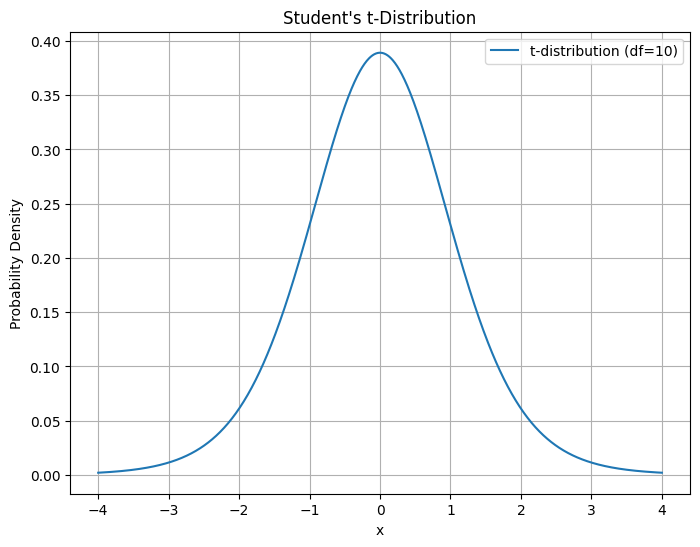

In [6]:
#Q10. Q9. Generate a Student's t-distribution plot using Python's matplotlib library, with the degrees of freedom parameter set to 10.


import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the degrees of freedom
df = 10

# Generate x values for the plot
x = np.linspace(-4, 4, 1000)

# Calculate the probability density function (PDF) of the t-distribution
pdf = stats.t.pdf(x, df)

# Plot the t-distribution
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label=f"t-distribution (df={df})")
plt.title("Student's t-Distribution")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Q10. Write a Python program to calculate the two-sample t-test for independent samples, given two random samples of equal size and a null hypothesis that the population means are equal.


import numpy as np
import scipy.stats as stats

def two_sample_t_test(sample1, sample2, alpha=0.05):
    """
    Function to perform two-sample t-test for independent samples.

    Args:
    - sample1: Array containing the data for sample 1.
    - sample2: Array containing the data for sample 2.
    - alpha: Significance level (default is 0.05).

    Returns:
    - t_statistic: The calculated t-statistic.
    - p_value: The p-value associated with the t-statistic.
    - reject_null: True if the null hypothesis is rejected, False otherwise.
    """

    # Calculate means and standard deviations
    mean1, mean2 = np.mean(sample1), np.mean(sample2)
    std1, std2 = np.std(sample1, ddof=1), np.std(sample2, ddof=1)
    n1, n2 = len(sample1), len(sample2)

    # Calculate pooled standard deviation
    pooled_std = np.sqrt(((n1 - 1) * std1 ** 2 + (n2 - 1) * std2 ** 2) / (n1 + n2 - 2))

    # Calculate t-statistic
    t_statistic = (mean1 - mean2) / (pooled_std * np.sqrt(1 / n1 + 1 / n2))

    # Calculate degrees of freedom
    degrees_of_freedom = n1 + n2 - 2

    # Calculate p-value
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), degrees_of_freedom))

    # Determine whether to reject the null hypothesis
    reject_null = p_value < alpha

    return t_statistic, p_value, reject_null

# Generate two random samples of equal size
np.random.seed(42)  # for reproducibility
sample_size = 30
sample1 = np.random.normal(loc=10, scale=2, size=sample_size)
sample2 = np.random.normal(loc=12, scale=2, size=sample_size)

# Perform two-sample t-test
t_statistic, p_value, reject_null = two_sample_t_test(sample1, sample2)

# Display results
print("Two-Sample t-test Results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)
print("Null Hypothesis Rejected:", reject_null)


Two-Sample t-test Results:
t-statistic: -4.512913234547556
p-value: 3.176506547464264e-05
Null Hypothesis Rejected: True


Q11. What is Student’s t distribution? When to use the t-Distribution.

    -  Student's t-distribution, often referred to simply as the t-distribution, is a probability distribution that arises from the estimation of the population mean when the sample size is small and the population standard deviation is unknown. It is a symmetric distribution that closely resembles the normal distribution but has heavier tails, especially for small sample sizes.

- The t-distribution is characterized by its degrees of freedom (df), which represent the number of independent observations used to estimate the population parameters. As the degrees of freedom increase, the t-distribution approaches the standard normal distribution.

    -  When to Use the t-Distribution:
    
- Small Sample Sizes:

    - The t-distribution is particularly useful when dealing with small sample sizes (typically less than 30) where the population standard deviation is unknown.
    
    - In such cases, using the t-distribution accounts for the increased uncertainty in estimating the population mean from a small sample.
    
- Population Standard Deviation Unknown:

    - When the population standard deviation is unknown, the t-distribution is used instead of the normal distribution.
    - In practice, the population standard deviation is rarely known, especially when working with sample data.
    
- Estimation of Confidence Intervals and Hypothesis Testing:

    -    The t-distribution is commonly used in estimation of confidence intervals and hypothesis testing for population means.
    
    -    It provides a more accurate estimate of the variability in sample means and helps to make more reliable inferences about the population parameters.
    
- Assumption of Normality:

    -   When the sample size is large (>30) and the population standard deviation is known, the t-distribution approximates the normal distribution. However, even in such cases, using the t-distribution can provide robustness against violations of the normality assumption in the underlying population.
    
-  In summary, the t-distribution is used when working with small sample sizes or when the population standard deviation is unknown. It is a fundamental tool in statistical inference for estimating population parameters and making inferences about the underlying population based on sample data.








 Q12: What is t-statistic? State the formula for t-statistic.

    The t-statistic is a measure used in hypothesis testing to determine the significance of the difference between sample means or to assess the significance of a regression coefficient in linear regression analysis. It quantifies the difference between the sample statistic (such as the sample mean or regression coefficient) and the population parameter (such as the population mean or true regression coefficient) relative to the variability in the sample data.

    Formula for t-Statistic:
        
        The formula for the t-statistic depends on the context in which it is used. Here are the two common scenarios:

1. One-Sample t-Test:
        When comparing the sample mean to a known or hypothesized population mean, the formula for the t-statistic is:

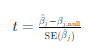

Where:

  -  x  is the sample mean,

  -  μ is the population mean (or the hypothesized population mean), s is the sample standard deviation,𝑛 is the sample size.
  
2. t-Test for Regression Coefficients:

    - In the context of linear regression analysis, the t-statistic is used to test the significance of regression coefficients. The formula for the t-statistic for a regression coefficient (slope) 

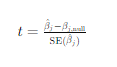


In both cases, the t-statistic measures how many standard errors the sample statistic is away from the hypothesized population parameter or null value. A larger absolute value of the t-statistic indicates a greater difference between the sample statistic and the null hypothesis, which may lead to a rejection of the null hypothesis in favor of an alternative hypothesis.

Q13. A coffee shop owner wants to estimate the average daily revenue for their shop. They take a random
sample of 50 days and find the sample mean revenue to be 500 with a standard deviation of 50.
Estimate the population mean revenue with a 95% confidence interval.

To estimate the population mean revenue with a 95% confidence interval, we can use the formula for the confidence interval for the population mean when the population standard deviation is known. Since the sample size is relatively large (n = 50) and the population standard deviation is given, we can use the z-distribution and the standard error formula to calculate the confidence interval.



Confidence Interval=500±1.96(50/ sqr(50))

Confidence Interval=500±1.96×7.07

Confidence Interval=500±13.85

Therefore, the 95% confidence interval for the population mean revenue is approximately 
500±13.85

486.15 to 513.85



Q14. A researcher hypothesizes that a new drug will decrease blood pressure by 10 mmHg. They conduct a clinical trial with 100 patients and find that the sample mean decrease in blood pressure is 8 mmHg with a standard deviation of 3 mmHg. Test the hypothesis with a significance level of 0.05.


Formulate Hypotheses:
Null Hypothesis (H0): The mean decrease in blood pressure (𝜇) is equal to 10 mmHg.

Alternative Hypothesis (Ha): The mean decrease in blood pressure (𝜇) is not equal to 10 mmHg.


Choose Significance Level:

The significance level (α) is given as 0.05.

Let's perform the calculations:

𝑡=8−10/(3/sqr(100))

-2/0.3= --6.67


Now, we compare the absolute value of the calculated t-statistic (6.67) with the critical value from the t-distribution at a significance level of 0.05 with 99 degrees of freedom.

If the absolute value of the calculated t-statistic is greater than the critical value, we reject the null hypothesis. Otherwise, we fail to reject the null hypothesis.

Q15. An electronics company produces a certain type of product with a mean weight of 5 pounds and a
standard deviation of 0.5 pounds. A random sample of 25 products is taken, and the sample mean weight
is found to be 4.8 pounds. Test the hypothesis that the true mean weight of the products is less than 5
pounds with a significance level of 0.01.

To test the hypothesis that the true mean weight of the products is less than 5 pounds, we can use a one-sample t-test for a population mean when the population standard deviation is known.

Here's how we can perform the hypothesis test:

Formulate Hypotheses:

Null Hypothesis (H0): The true mean weight of the products (μ) is equal to 5 pounds.

Alternative Hypothesis (Ha): The true mean weight of the products (𝜇) is less than 5 pounds.


Let's perform the calculations:

𝑡=4.8−5/0.5/sqr(25)

−0.2/0.5/5=−2


Now, we compare the calculated t-statistic (-2) with the critical value from the t-distribution at a significance level of 0.01 with 24 degrees of freedom.

Q16. Two groups of students are given different study materials to prepare for a test. The first group (n1 =30) has a mean score of 80 with a standard deviation of 10, and the second group (n2 = 40) has a mean score of 75 with a standard deviation of 8.Test the hypothesis that the population means for the two groups are equal with a significance level of 0.01.
    
 To test the hypothesis that the population means for the two groups are equal, we can use the independent two-sample t-test.

Here's how we can perform the hypothesis test:

Formulate Hypotheses:
Null Hypothesis (H0): The population means for the two groups are equal


Alternative Hypothesis (Ha): The population means for the two groups are not equal.

Let's perform the calculations:

𝑡=80−75/sqr((10^2/30)+(8^2/40))


Now, we compare the absolute value of the calculated t-statistic with the critical value from the t-distribution or calculate the p-value. Let's calculate the t-statistic and make the decision using Pyth

Q17. A marketing company wants to estimate the average number of ads watched by viewers during a TV
program. They take a random sample of 50 viewers and find that the sample mean is 4 with a standard
deviation of 1.5. Estimate the population mean with a 99% confidence interval.



To estimate the population mean number of ads watched by viewers during a TV program with a 99% confidence interval, we can use the formula for the confidence interval for the population mean when the population standard deviation is unknown. Since the sample size is relatively large (n = 50), we'll use the t-distribution instead of the normal distribution.

The formula for the confidence interval for the population mean (μ) is given by:

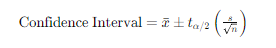


Confidence Interval=4±t0.005(1.5\sqr( 50)


